In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
db = pd.read_csv("Fuel_Consumption_2000-2022.csv")
db

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [40]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [41]:
db.nunique()

YEAR                  23
MAKE                  87
MODEL               4242
VEHICLE CLASS         32
ENGINE SIZE           63
CYLINDERS              9
TRANSMISSION          30
FUEL                   5
FUEL CONSUMPTION     228
HWY (L/100 km)       152
COMB (L/100 km)      192
COMB (mpg)            59
EMISSIONS            358
dtype: int64

In [42]:
db.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [43]:
db["MAKE"].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [44]:
db['MAKE'].replace(to_replace=['Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo'],value=['ACURA','ALFA ROMEO','ASTON MARTIN',
                                                                        'AUDI','BENTLEY','BUGATTI','BUICK','CADILLAC',
                                                                       'CHEVROLET','CHRYSLER','DODGE','FORD','GENESIS',
                                                                       'HONDA','HYUNDAI','INFINITI','JAGUAR','JEEP',
                                                                       'KIA','LAMBORGHINI','LAND ROVER','LEXUS',
                                                                       'LINCOLN','MASERATI','MAZDA','MERCEDES-BENZ',
                                                                       'MITSUBISHI','NISSAN','PORSCHE','RAM',
                                                                       'ROLLS-ROYCE','SUBARU','TOYOTA','VOLKSWAGEN','VOLVO'],inplace=True)

In [45]:
db["VEHICLE CLASS"].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [46]:
db["VEHICLE CLASS"].replace(to_replace=['Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'],value=["COMPACT","SUV - SMALL","TWO-SEATER",
                                        "MID-SIZE","MINICOMPACT","SUBCOMPACT",
                                        "STATION WAGON - SMALL","FULL-SIZE","SUV - STANDARD",
                                        "SPECIAL PURPOSE VEHICLE","PICKUP TRUCK - SMALL","PICKUP TRUCK - STANDARD",
                                        "MINIVAN","VAN - PASSENGER","STATION WAGON - MID-SIZE"],
                           inplace=True)

[Text(0.5, 1.0, 'CARS BY EACH BRAND'),
 Text(0.5, 0, 'CAR BRAND'),
 Text(0, 0.5, 'NUMBER OF CARS')]

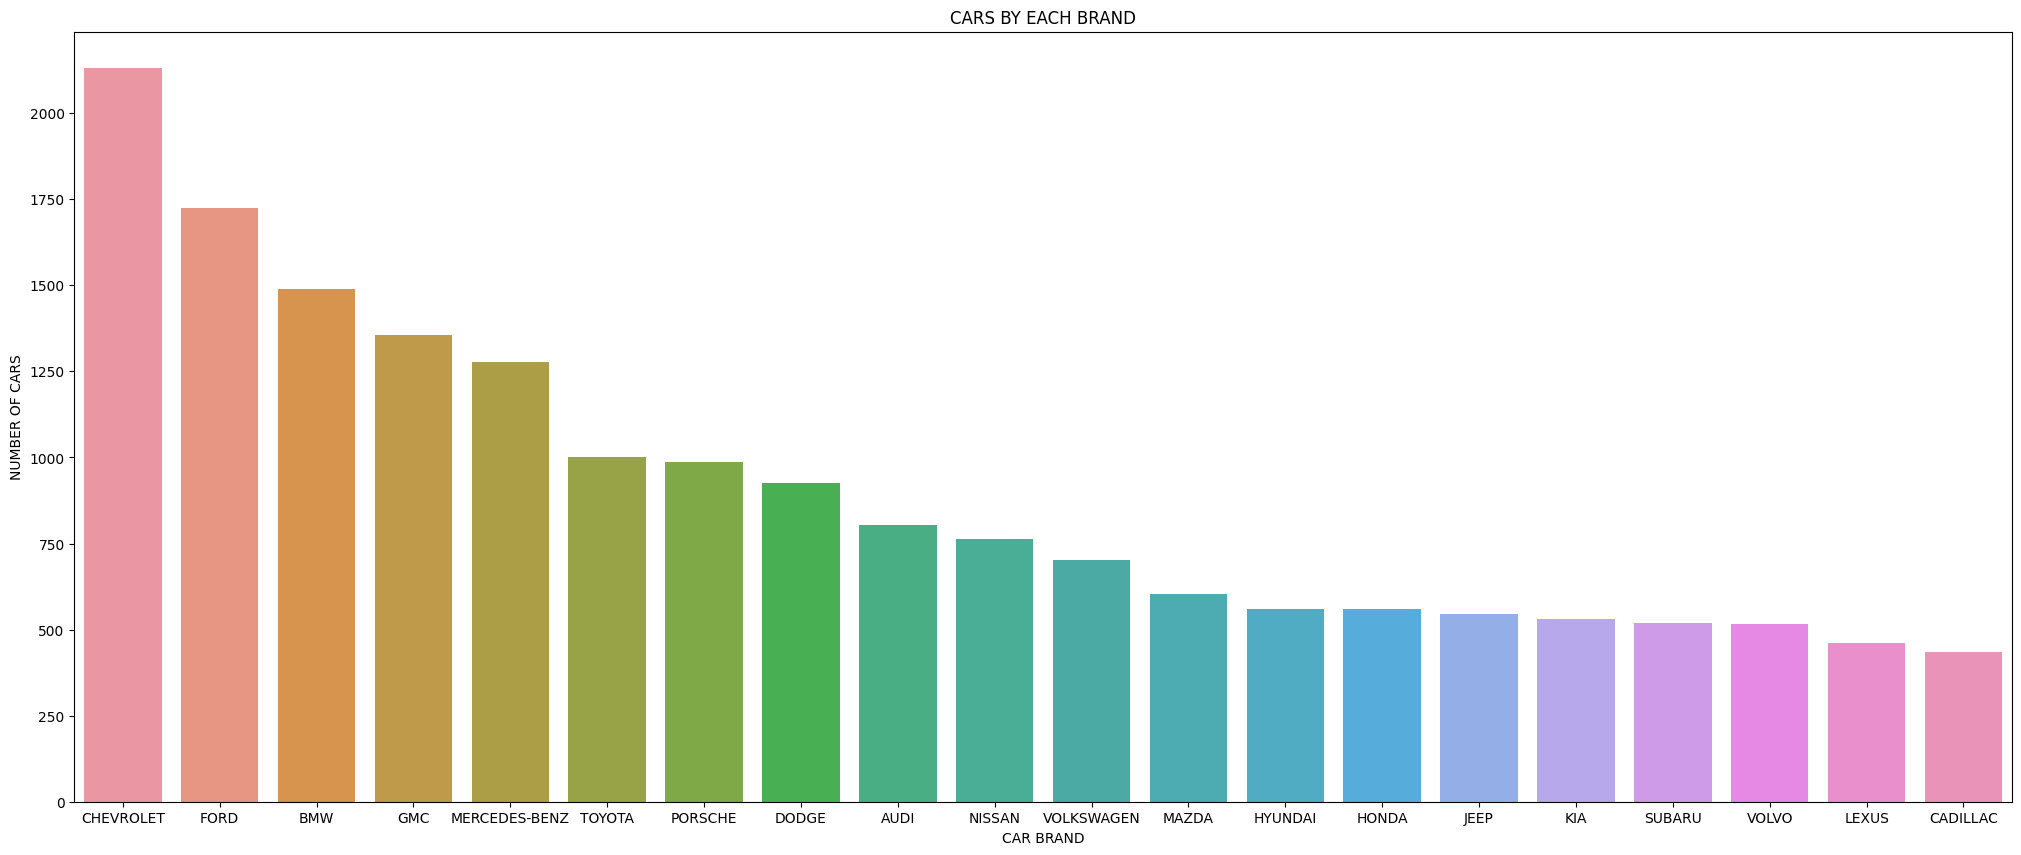

In [47]:
# NUMBER OF CARS CREATED BY EACH BRAND
plt.figure(figsize=(25, 10))
sns.countplot(x=db["MAKE"], order = db['MAKE'].value_counts().head(20).index).set(title='CARS BY EACH BRAND', xlabel='CAR BRAND', ylabel='NUMBER OF CARS')

[Text(0.5, 1.0, 'NUMBER OF CARS CREATED EACH YEAR'),
 Text(0.5, 0, 'YEAR'),
 Text(0, 0.5, 'NUMBER OF CARS')]

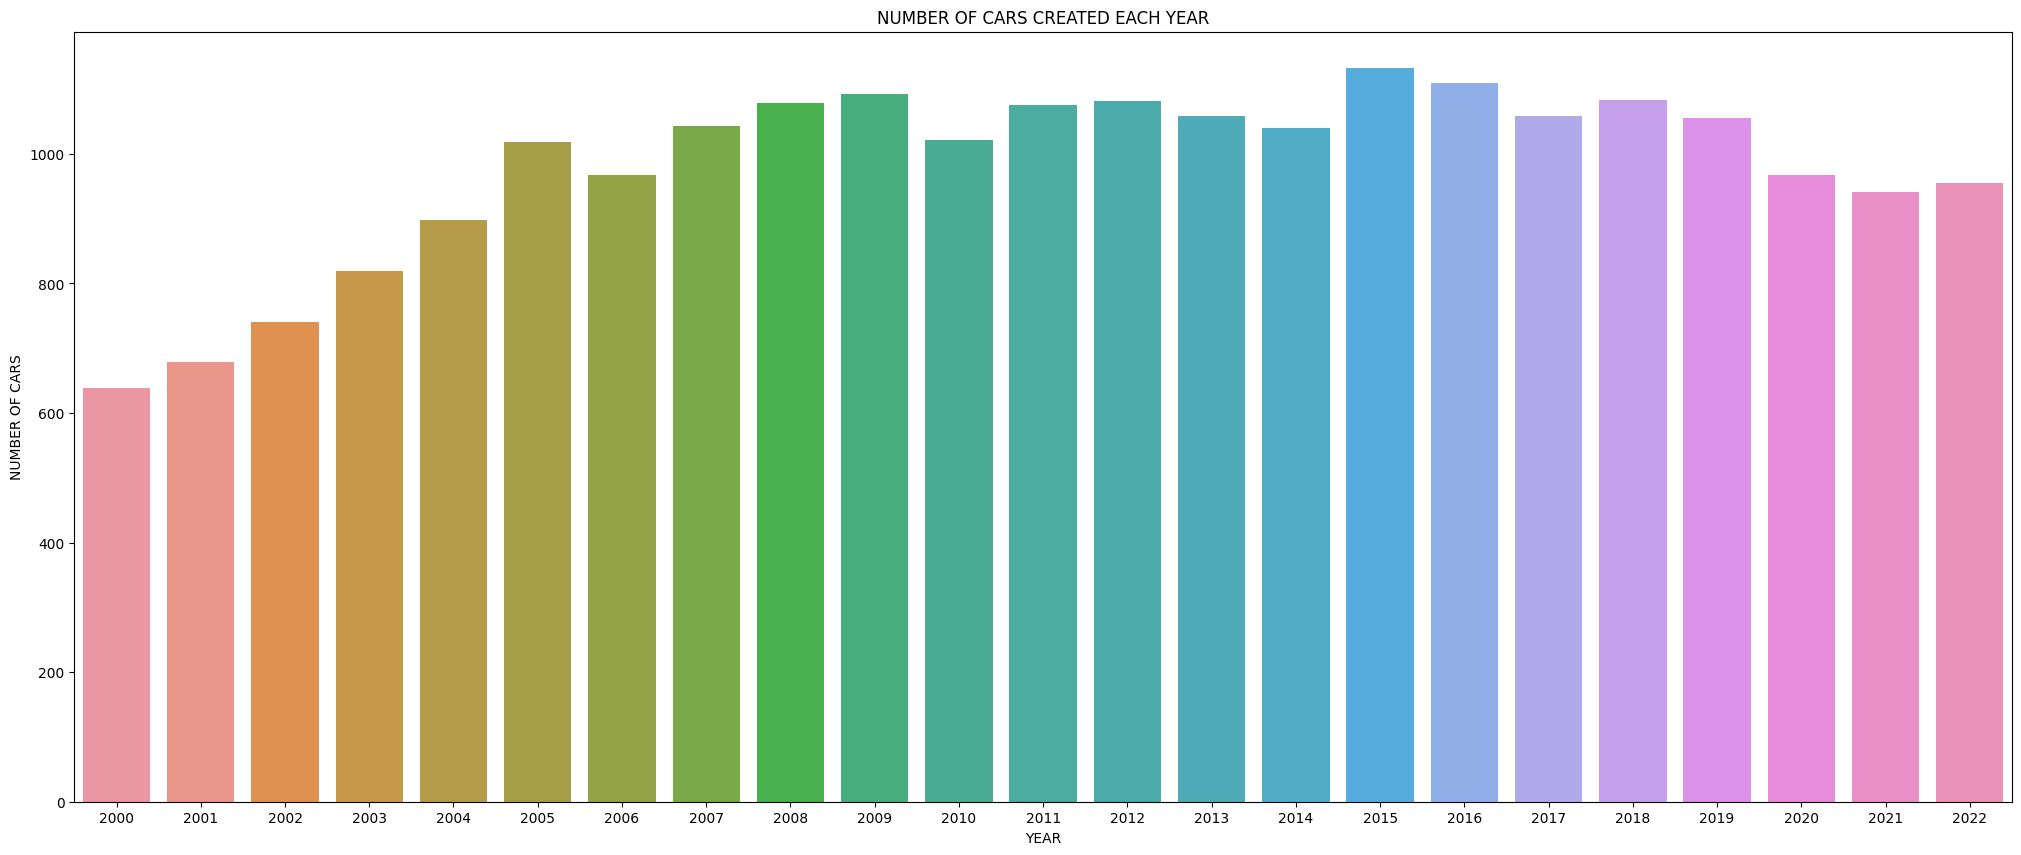

In [48]:
# NUMBER OF NEW CARS CREATED EACH YEAR
plt.figure(figsize=(25, 10))
sns.countplot(x=db["YEAR"]).set(title='NUMBER OF CARS CREATED EACH YEAR', xlabel='YEAR', ylabel='NUMBER OF CARS')

[Text(0.5, 1.0, 'VEHICLE TYPE'),
 Text(0.5, 0, 'VEHICLE CLASS'),
 Text(0, 0.5, 'NUMBER OF CARS')]

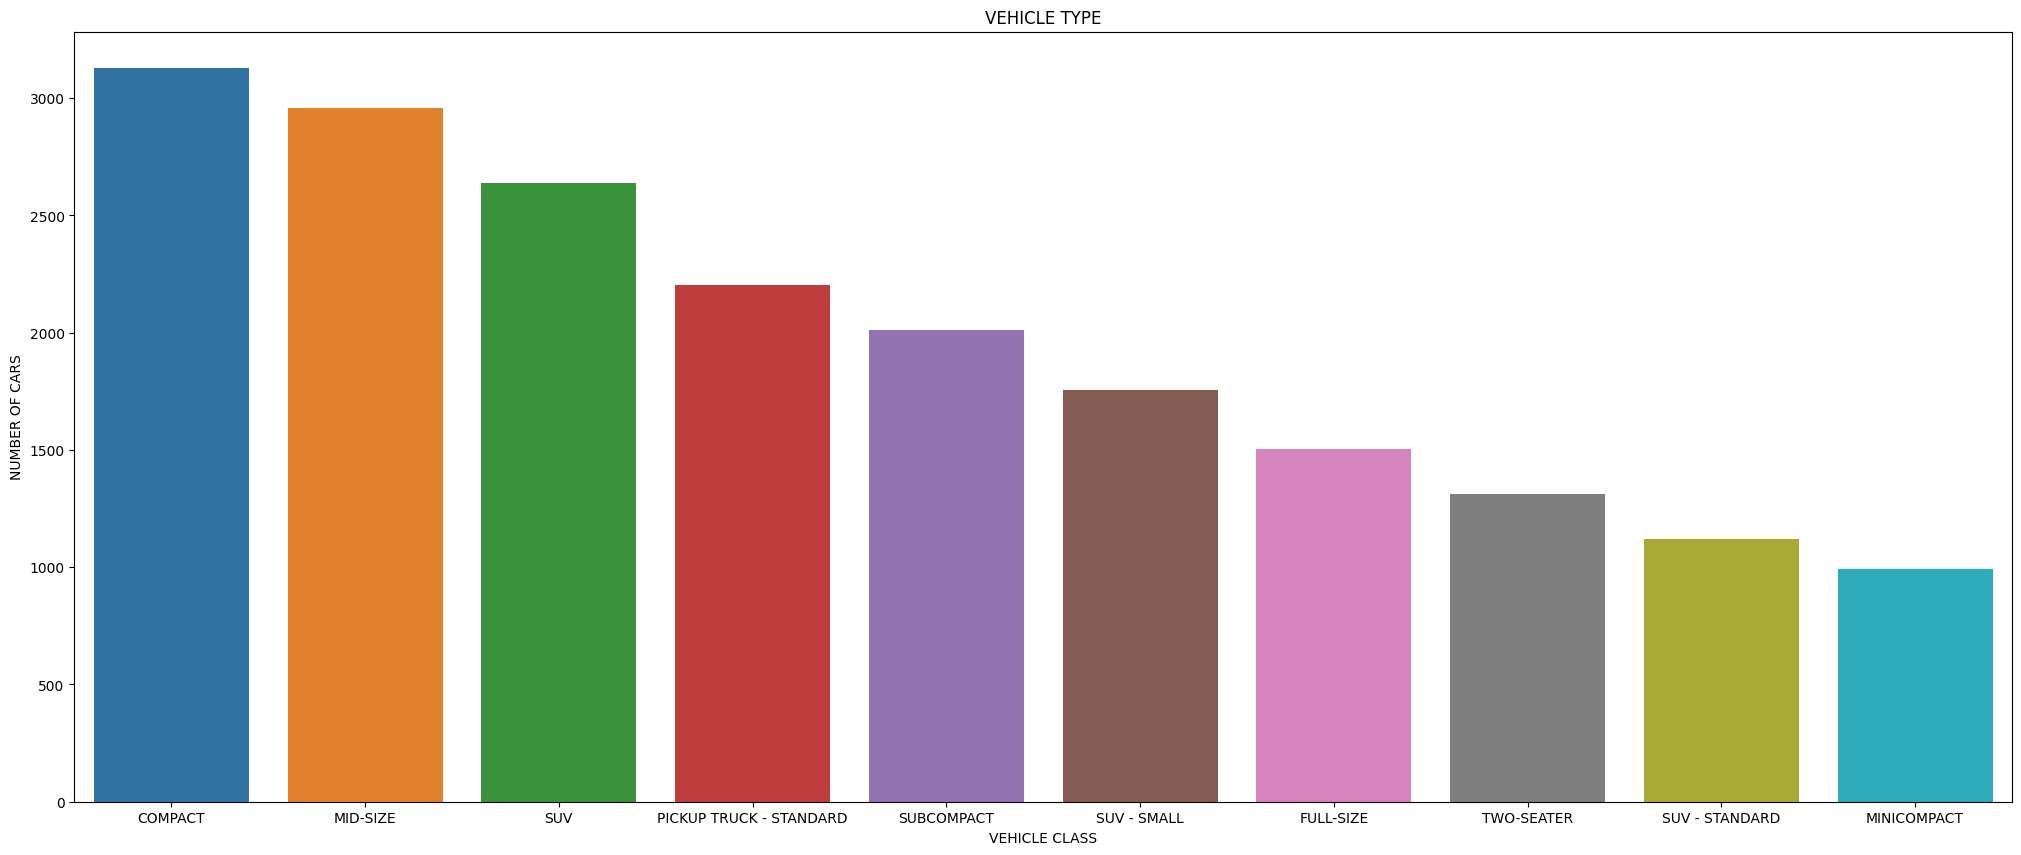

In [49]:
# MOST POPULAR VEHICLE TYPE
plt.figure(figsize=(25, 10))
sns.countplot(x=db["VEHICLE CLASS"], order = db['VEHICLE CLASS'].value_counts().head(10).index).set(title='VEHICLE TYPE', xlabel='VEHICLE CLASS', ylabel='NUMBER OF CARS')

[Text(0.5, 1.0, 'CAR ENGINE SIZE'),
 Text(0.5, 0, 'ENGINE SIZE (LITRES)'),
 Text(0, 0.5, 'NUMBER OF CARS')]

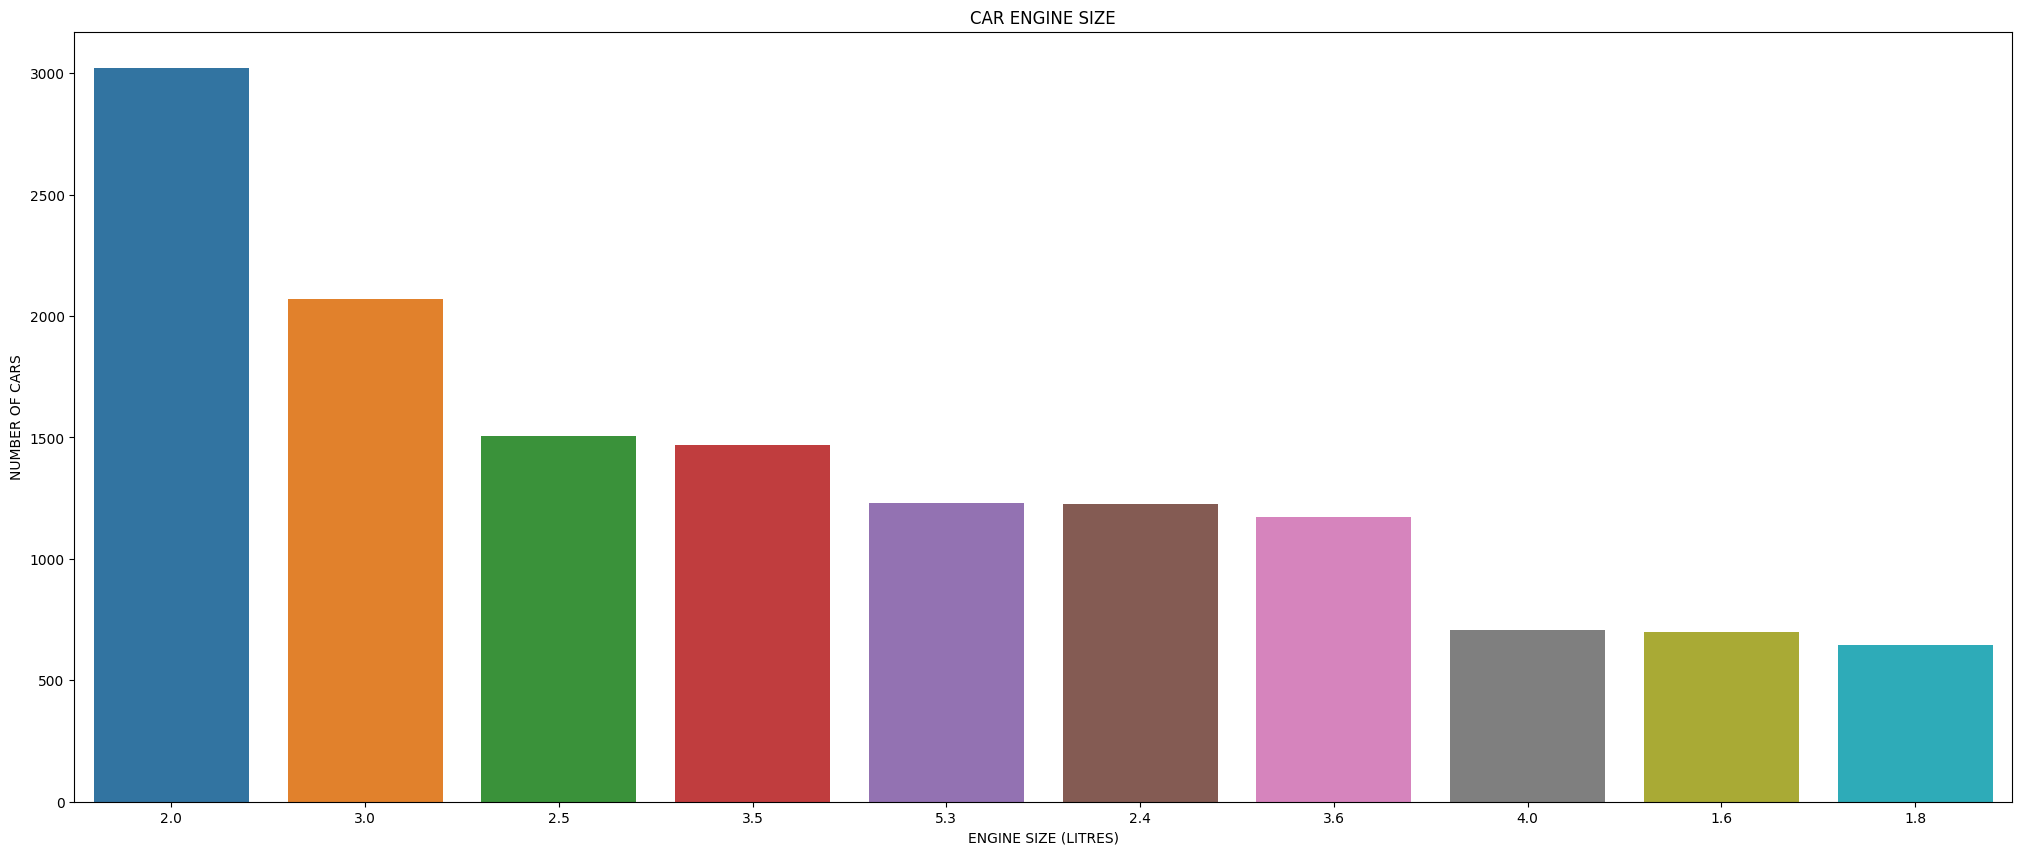

In [50]:
# MOST COMMON ENGINE SIZE
plt.figure(figsize=(25, 10))
sns.countplot(x=db["ENGINE SIZE"], order = db['ENGINE SIZE'].value_counts().head(10).index).set(title='CAR ENGINE SIZE', xlabel='ENGINE SIZE (LITRES)', ylabel='NUMBER OF CARS')

[Text(0.5, 1.0, 'CYLINDER SIZE'),
 Text(0.5, 0, 'CYLINDERS SIZE'),
 Text(0, 0.5, 'NUMBER OF CARS')]

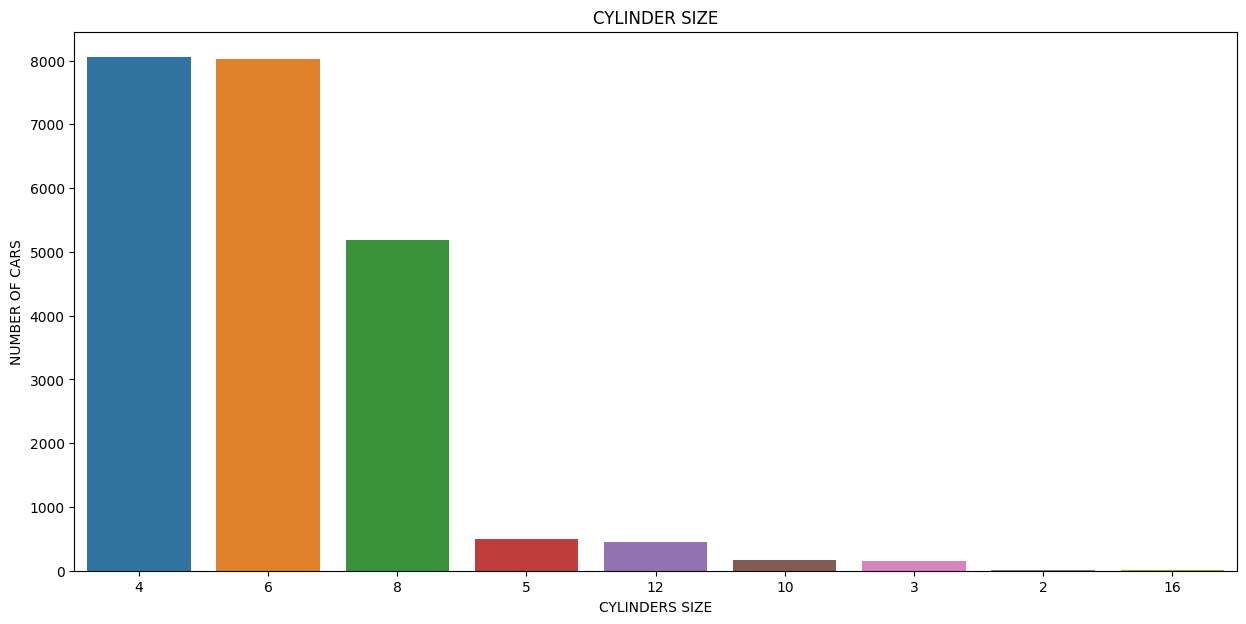

In [51]:
# MOST POPULAR CYLINDER SIZE USED IN CARS
plt.figure(figsize=(15, 7))
sns.countplot(x=db["CYLINDERS"], order = db['CYLINDERS'].value_counts().head(10).index).set(title='CYLINDER SIZE', xlabel='CYLINDERS SIZE', ylabel='NUMBER OF CARS')

[Text(0.5, 1.0, 'TRANSMISSION TYPE IN CAR'),
 Text(0.5, 0, 'TRANSMISSION TYPE'),
 Text(0, 0.5, 'NUMBER OF CARS')]

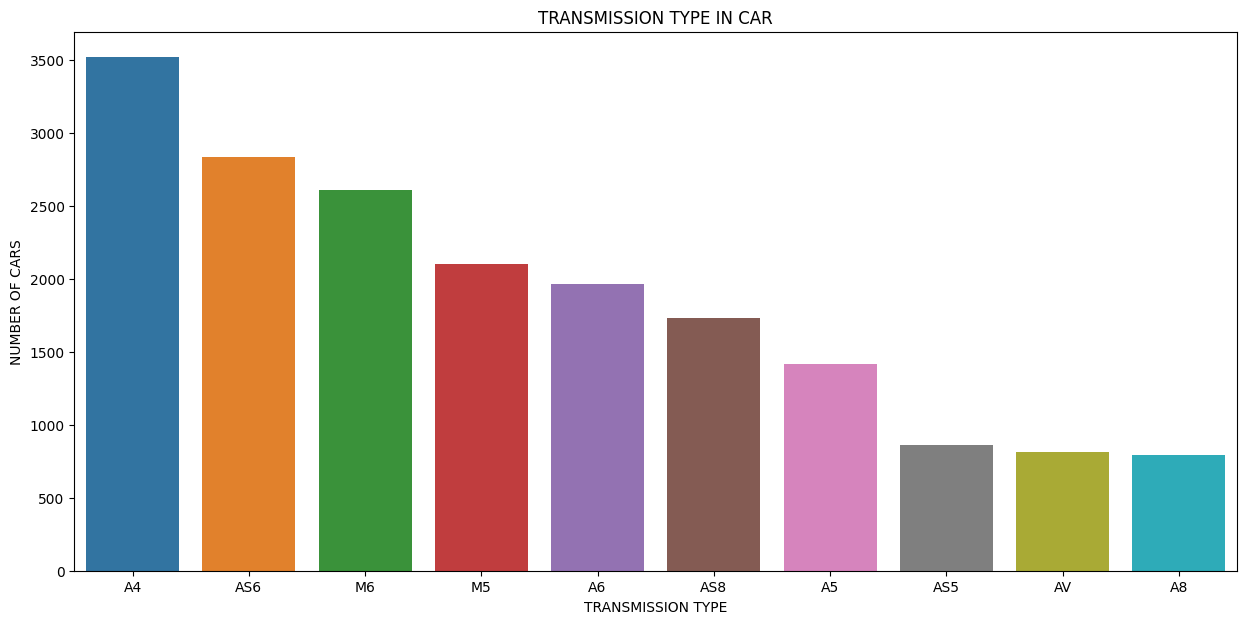

In [52]:
# MOST POPULAR TRANSMISSION TYPE IN CARS
plt.figure(figsize=(15, 7))
sns.countplot(x=db["TRANSMISSION"], order = db['TRANSMISSION'].value_counts().head(10).index).set(title='TRANSMISSION TYPE IN CAR', xlabel='TRANSMISSION TYPE', ylabel='NUMBER OF CARS')

Text(0.5, 1.0, 'EMISSIONS BASED ON CAR CYLINDER')

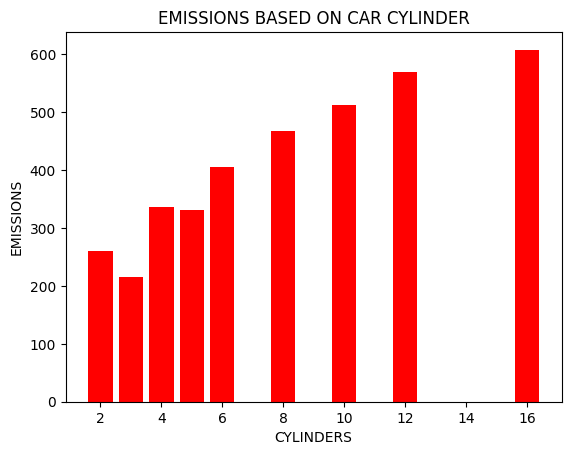

In [53]:
# EMISSION BASED ON CYLINDER SIZE
plt.bar(db["CYLINDERS"],db["EMISSIONS"],color='r') 
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.title('EMISSIONS BASED ON CAR CYLINDER')

Text(0.5, 1.0, 'FUEL CONSUMPTION BASED ON CYLINDER')

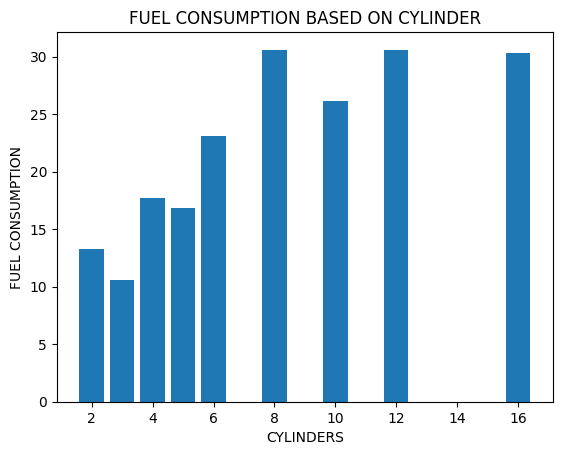

In [54]:
# FUEL CONSUMPTION BASED ON CYLINDERS SIZE
plt.bar(db["CYLINDERS"],db["FUEL CONSUMPTION"]) 
plt.xlabel('CYLINDERS')
plt.ylabel('FUEL CONSUMPTION')
plt.title('FUEL CONSUMPTION BASED ON CYLINDER')